# Chapter 4 - Data Preprocessing for Credit Risk modeling

We will start out notebook by loading all datasets that might be useful for us.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.patches import Ellipse

In [2]:
csvs_path = [rf'datasets/{name}.csv' for name in ['hmeq', 'lgd', 'ratings', 'mortgage']]
hmeq, lgd, ratings, mortgage = list(map(pd.read_csv, csvs_path))

### Sampling

Here we will take a look at hmeq and then try to sample a certain number of observations while keeping the ratio os bads we see in the dataset.

In [3]:
df = pd.crosstab(hmeq['BAD'], 'Frequency')
df.loc[:, 'Percent'] = df/len(hmeq)*100
df.loc[:, 'Cumulative Frequency'] = df['Frequency'].cumsum()
df.loc[:, 'Cumulative Percent'] = df['Percent'].cumsum()
df

col_0,Frequency,Percent,Cumulative Frequency,Cumulative Percent
BAD,,,,
0,4771,80.050336,4771,80.050336
1,1189,19.949664,5960,100.000000


Below we can see that we have almost the same percentage of BADs as the original table, but with a more limited number of observations

In [4]:
np.random.seed(12345)
def stratified_sample_df(df, col, n_samples):
    return df.groupby(col, group_keys=False). apply(lambda x: x.sample(frac=n_samples/df.shape[0])) 

df_ = stratified_sample_df(hmeq, 'BAD', 1000)
df = pd.crosstab(df_['BAD'], 'Frequency')
df.loc[:, 'Percent'] = df/len(df_)*100
df.loc[:, 'Cumulative Frequency'] = df['Frequency'].cumsum()
df.loc[:, 'Cumulative Percent'] = df['Percent'].cumsum()
df

C:\Users\guilh\AppData\Local\Temp\ipykernel_32688\1675286802.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return df.groupby(col, group_keys=False). apply(lambda x: x.sample(frac=n_samples/df.shape[0]))


col_0,Frequency,Percent,Cumulative Frequency,Cumulative Percent
BAD,,,,
0,801,80.1,801,80.1
1,199,19.9,1000,100.0


### Visual Data Exploration and Exploratory Statistical Analysis

We can have a look at central tendency and the variability of our data by using histograms or bar charts. This could also be useful to compare against known distibutions such as the normal or the beta.

C:\Users\guilh\AppData\Local\Temp\ipykernel_32688\1675286802.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return df.groupby(col, group_keys=False). apply(lambda x: x.sample(frac=n_samples/df.shape[0]))


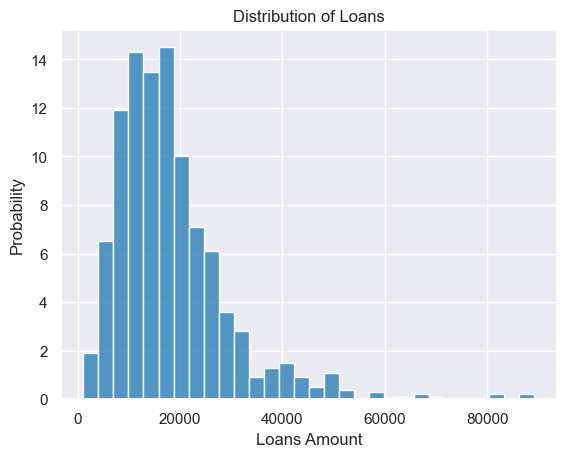

In [32]:
strat_data = stratified_sample_df(hmeq, 'BAD', 1000)
sns.histplot(strat_data['LOAN'], bins=30, kde=False, stat = 'percent')
_ = plt.ylabel('Probability')
_ = plt.xlabel('Loans Amount')
_ = plt.title('Distribution of Loans')

But if we want to show, for example how the job distribution look like, we can use a pie chart to have a clear visual of the concentration or how much (in percentage terms) we have from one job or the other. However, it's important to be aware that pie charts can easily misrepresent percentages and became hard to read. There's a lot of arguments about the use of pie charts, but in general, they should be used only when there just a few categories and the percentages are dissimilar.

,JOB,LOAN
0,Mgr,126
1,Office,165
2,Other,399
3,ProfExe,213
4,Sales,14
5,Self,33


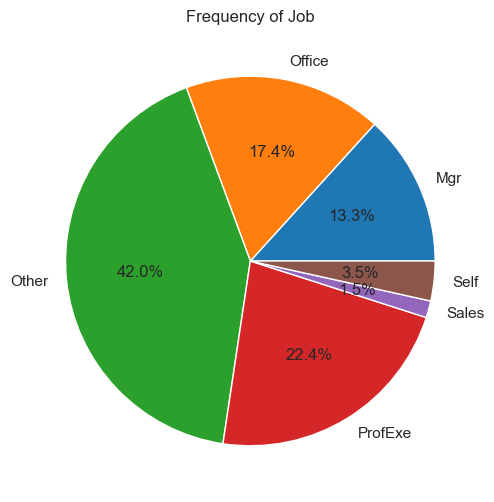

In [28]:
df_ = strat_data.groupby('JOB').count()['LOAN'].reset_index()
sns.set_style("darkgrid") # Set style for chart
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.0})
plt.figure(figsize=(6,6)) # Set figure size
plt.pie(df_['LOAN'], labels=df_['JOB'], autopct='%1.1f%%') # Create pie chart
plt.title('Frequency of Job')
plt.show() # Show chart

In this case we can see that more than 40% of our loans have uncategorized jobs ("Other")

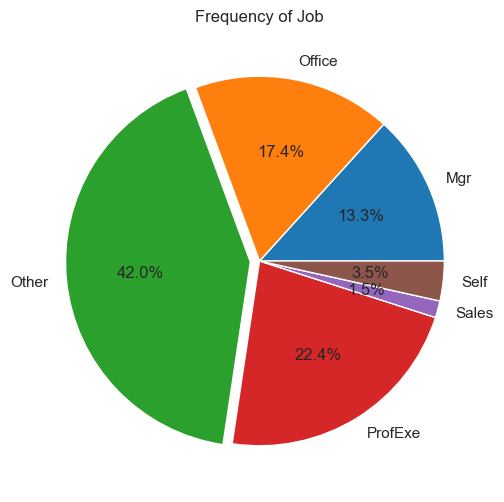

In [29]:
plt.figure(figsize=(6,6)) # Set figure size
plt.pie(df_['LOAN'], labels=df_['JOB'], autopct='%1.1f%%', explode = [0,0,0.05,0,0,0]) # Create pie chart
plt.title('Frequency of Job')
plt.show() # Show chart

Another option are scatter plots that help you visualize one variable against another to look for patterns in the data.

<Axes: xlabel='MORTDUE', ylabel='LOAN'>

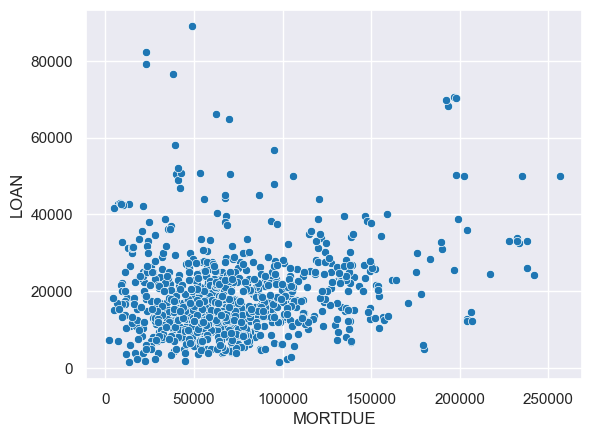

In [31]:
sns.scatterplot(data = strat_data, x = 'MORTDUE', y = 'LOAN')

You can also relate multiple variables in your plot by using the hue parameter in sns, for example.

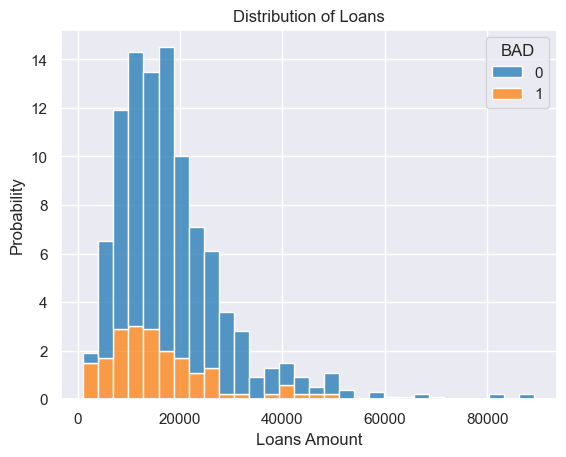

In [39]:
sns.histplot(data = strat_data, x = 'LOAN', bins=30, kde=False, stat = 'percent', hue='BAD', multiple='stack')
_ = plt.ylabel('Probability')
_ = plt.xlabel('Loans Amount')
_ = plt.title('Distribution of Loans')

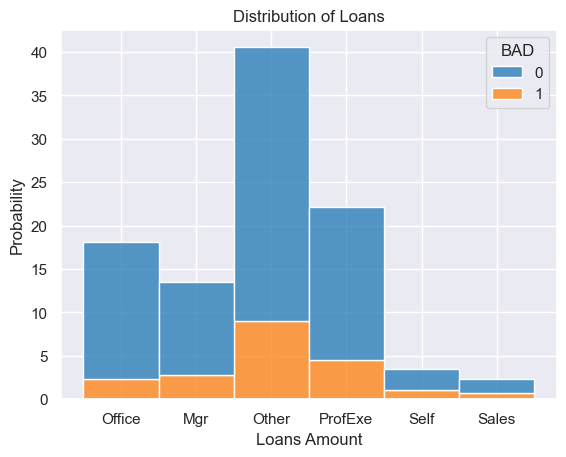

In [40]:
sns.histplot(data = strat_data, x = 'JOB', bins=30, kde=False, stat = 'percent', hue='BAD', multiple='stack')
_ = plt.ylabel('Probability')
_ = plt.xlabel('Loans Amount')
_ = plt.title('Distribution of Loans')

### Descriptive Statistics

In the last chapter notebook we went into more detail about how to replicate most of the descriptives statistics present in SAS in python. In this short recap I'll just help us remember about the simplest one to have a fast look at the data using pandas, as probably most of our data will be in a data frame.

In [45]:
strat_data.describe( percentiles=[.25, .5, .75, .9, .99], exclude='category')

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,1000.000000,1000.00000,901.000000,977.00000,954,957,918.000000,896.000000,908.000000,947.000000,917.000000,962.000000,778.000000
unique,NaN,NaN,NaN,NaN,2,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,DebtCon,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,635,388,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.199000,18293.10000,71971.009434,99787.52651,NaN,NaN,8.873312,0.313616,0.458150,181.857140,1.186478,21.187110,33.545100
std,0.399448,11225.70438,43980.104516,58571.35482,NaN,NaN,7.603860,0.977326,1.082796,85.140301,1.786996,9.703316,7.500538
min,0.000000,1100.00000,2063.000000,8800.00000,NaN,NaN,0.000000,0.000000,0.000000,3.044384,0.000000,0.000000,1.855540
25%,0.000000,10600.00000,45701.000000,65000.00000,NaN,NaN,3.000000,0.000000,0.000000,115.194468,0.000000,15.000000,28.918158
50%,0.000000,16100.00000,63671.000000,87893.00000,NaN,NaN,7.000000,0.000000,0.000000,173.575105,1.000000,20.000000,34.787069
75%,0.000000,22500.00000,88738.000000,116097.00000,NaN,NaN,13.000000,0.000000,0.000000,237.511568,2.000000,26.000000,39.097741


For more detail on describe please look at the pandas documentation.

### Missing values

Even in the most controlled and well-designed environments missing data can occur and reduce the statistical power of a study, produce biased estimates and lead to invalid conclusions. Some analytical techniques can deal directly with missing values while others need some additional preprocessing. In this book, the authors brings to us 3 they consider the most popular schemes to deal with missing values.
- Replace the data with a known value
- Delete the observations or variables with lots of missing values (it's important to notice the assumption that the information is missing at random and will not have impact on our analysis)
- Keep the missing values as they can be meaningful. An interesting example that the book gives us is that if a costumes did not disclose his or her income it might be because this client is currently unemployed and this might have a relationship with the default.

A practical way is first start by statistically testing whether missing information is related to the target variable you want to look at and based on this you can choose to make a special category for it, if it's relevant or delete or replace the data if it's not relevant.

### Outlier detection and treatment

By the dictionary outliers are "a person or thing situated away or detached from the main body or system", but how does this translates to statistics or data analysis? Well,  we can think of an outlier as a point that differs significantly from other observations, it can be a valid or invalid observation.
Important steps when dealing with outliers are detecting and treating these data point. There's a lot of different way to detect outliers, you can do it visually, by looking at plots like histogram or scatter plots or you can use some measures, likes the z-score, that measures how many standard deviations an observation lies away from the mean.
As a practical rule of thumb outliers are defined as having z-score bigger than 3 (because if our distribution were normal this would mean the data is outside at least 99.7% of our distribution )

If our outliers are multivariate we have to use other tools. But most of the time, this is not considered in a modeling exercise due to typical marginal impact. Still, it's important to be aware they might exist because sometimes our case is not the one where we can ignore these outliers.

In pandas we can calculate the z-score using scipy's function as shown below:

In [56]:
from scipy.stats import zscore
#numeric_cols = strat_data.select_dtypes(include=[np.number]).columns
z_scored = strat_data[['BAD', 'LOAN']].apply(zscore)
z_scored


,BAD,LOAN
1654,-0.498437,-0.578703
2016,-0.498437,-0.480665
5451,-0.498437,1.248377
5955,-0.498437,6.292900
321,-0.498437,-1.095633
...,...,...
163,2.006272,-1.184759
180,2.006272,-1.184759
5822,2.006272,2.825904
4681,2.006272,0.562108


Then we can check or filter out points with z-score bigger than 3.

In [68]:
use_idx = z_scored.apply(lambda x: (abs(x) <= 3), axis = 1)
z_scored['LOAN'][use_idx['LOAN']]

1654   -0.578703
2016   -0.480665
5451    1.248377
321    -1.095633
2619   -0.293500
          ...   
163    -1.184759
180    -1.184759
5822    2.825904
4681    0.562108
633    -0.926294
Name: LOAN, Length: 986, dtype: float64

While our observation had 1000 rows, the filtered out data has only 986, which means that 14 observations were left out.

### Stardardizing Data